**Introduction**

---


The focus of this project was to explore the IBM employee dataset, understand the patterns, and check the drivers behind employee attrition. I ran exploratory data analysis(EDA) and gained some insights that could potentially help enhance employee retention strategies.

**Analysis Tools & Techniques**
Python Notebook (GoogleColab)
Pandas, Numpy for data handling
Seaborn, Matplotlib for data visualization

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Running EDA to understand the dataset

In [9]:
# Reading the file and understanding the data
df = pd.read_csv("IBM HR Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
 # General structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# # Basic statistics
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [12]:
# Check for missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [13]:
# Check column names and data types
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

# Unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':", df[col].unique())


Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
Environme

In [14]:
# Check missing values
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

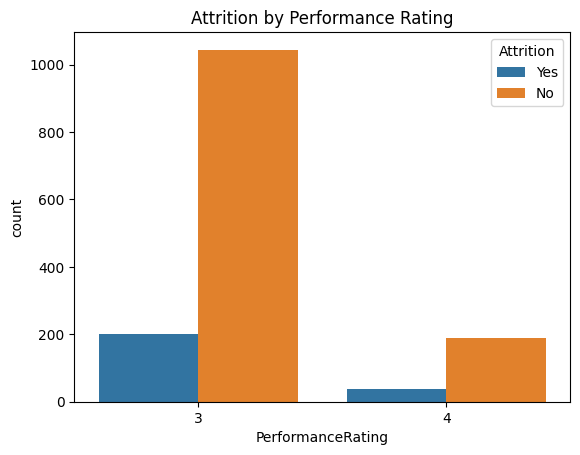

In [15]:
sns.countplot(data=df, x='PerformanceRating', hue='Attrition')
plt.title('Attrition by Performance Rating')
plt.show()

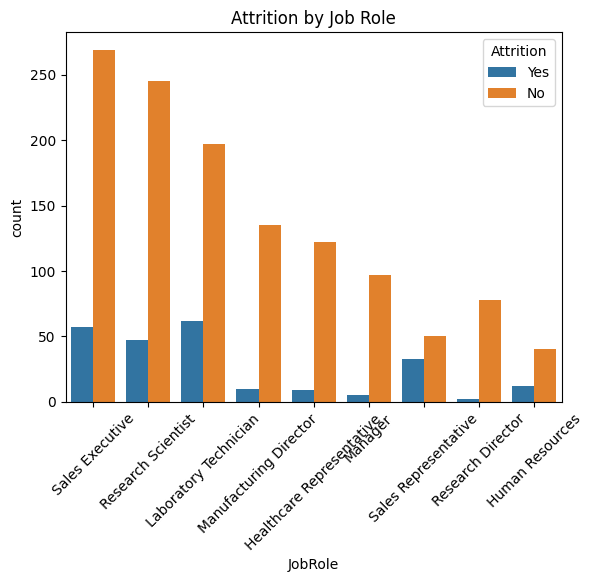

In [16]:
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

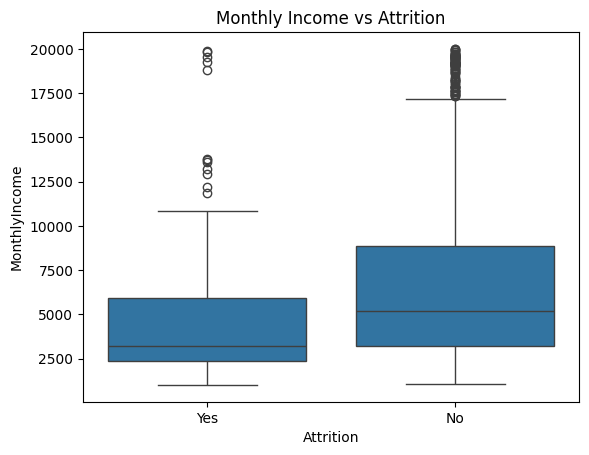

In [17]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition')
plt.show()

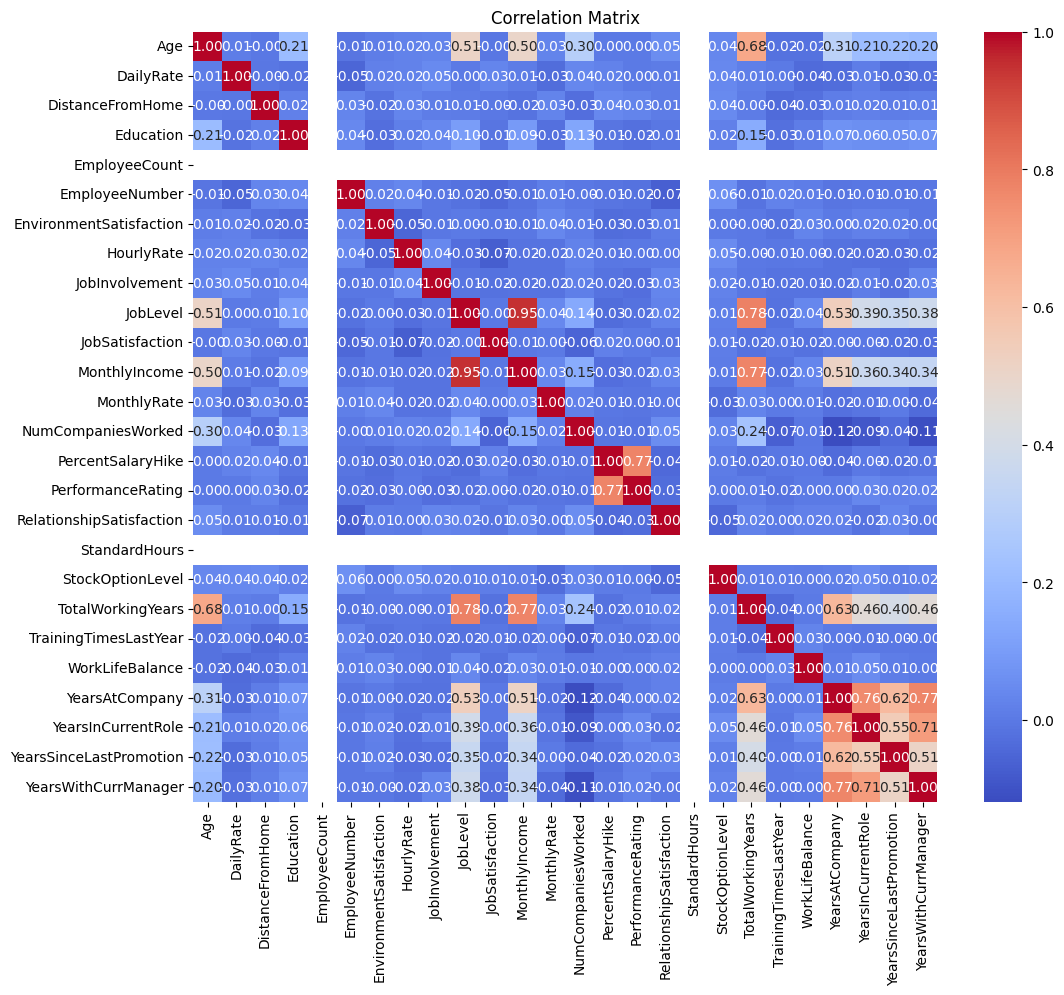

In [18]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

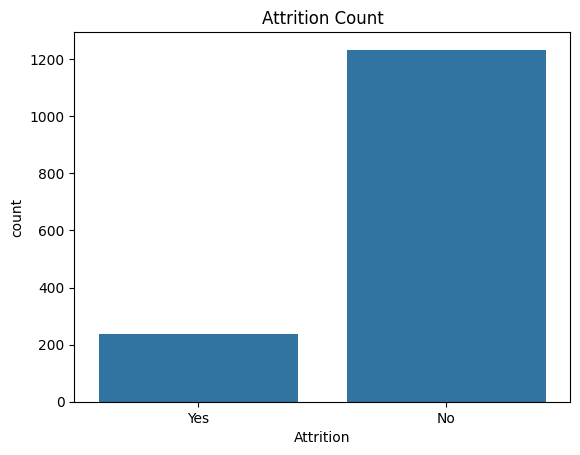

In [19]:
# Attrition count
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()

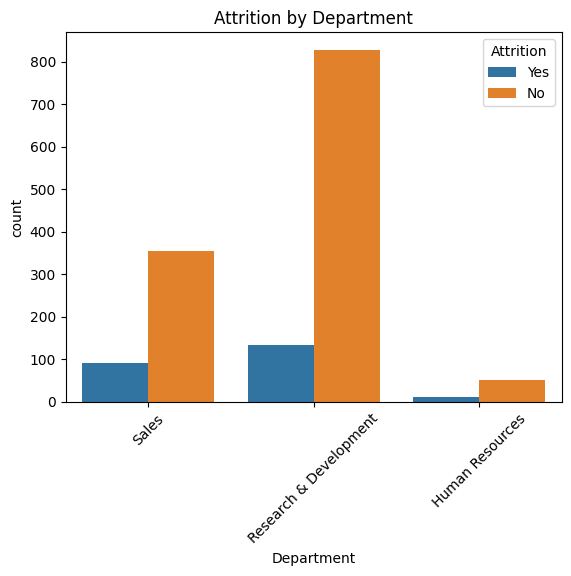

In [20]:
# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

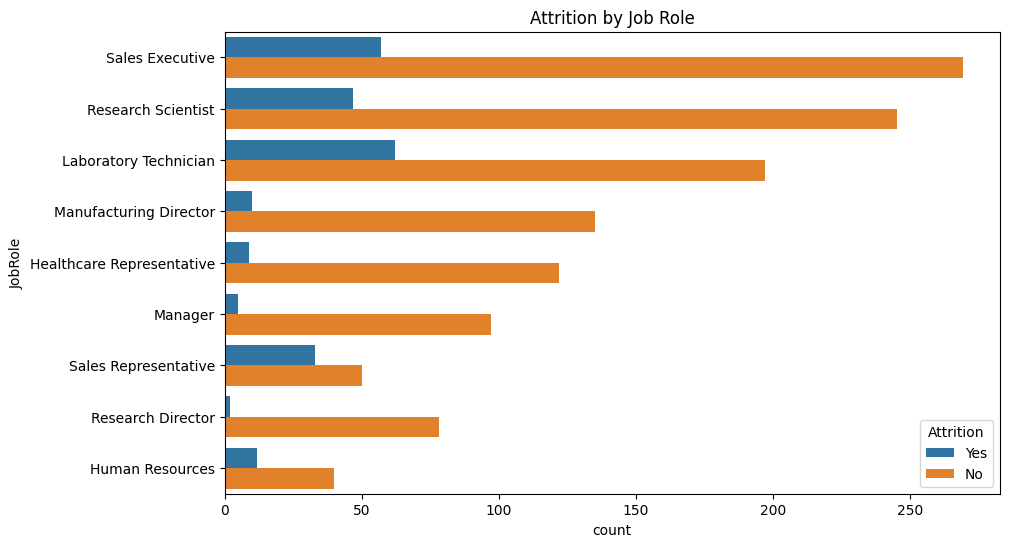

In [21]:
# Attrition by Job Role
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.show()

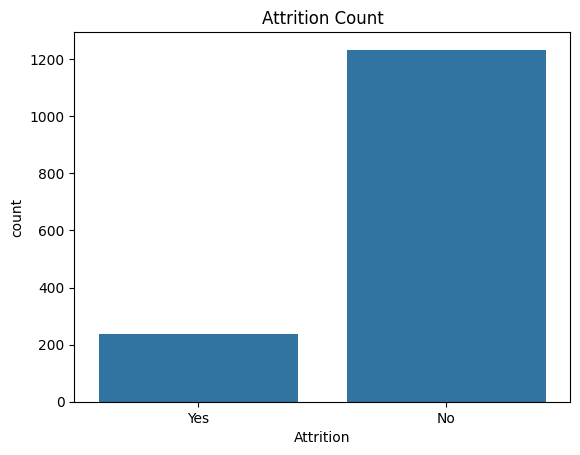

In [22]:
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()

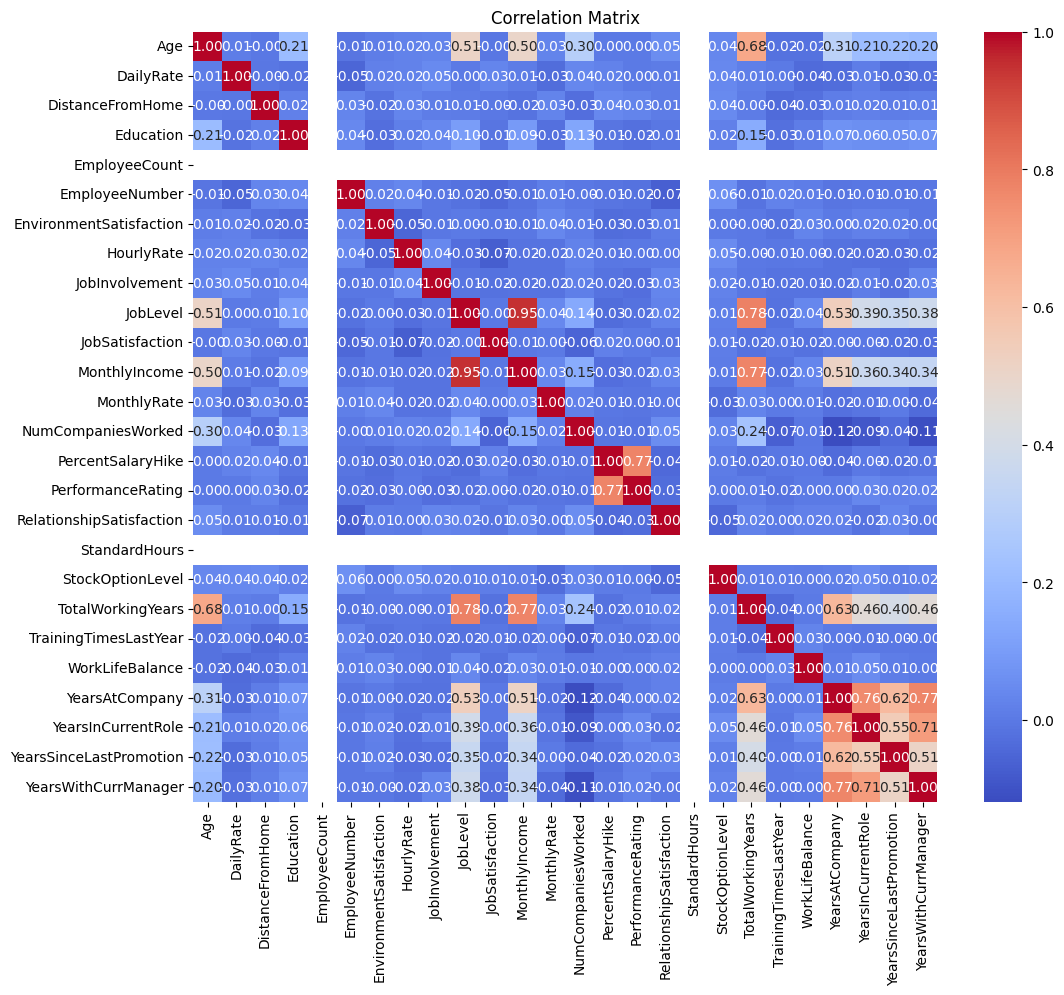

In [23]:
# Correlation heatmap
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [37]:
# Map categorical target and binary features
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = pd.get_dummies(df, drop_first=True)

In [27]:

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = pd.get_dummies(df, drop_first=True)

In [31]:
# Save this version for modeling use
cleaned_path = "/content/ibm_attrition_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"Cleaned data saved to: {cleaned_path}")

Cleaned data saved to: /content/ibm_attrition_cleaned.csv


#Modeling to test the future predictions

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [36]:
# Load the dataset
df = pd.read_csv("IBM HR Employee-Attrition.csv")

In [39]:
# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [40]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [41]:
# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Predictions
y_pred = model.predict(X_test)

In [43]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[241   6]
 [ 42   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



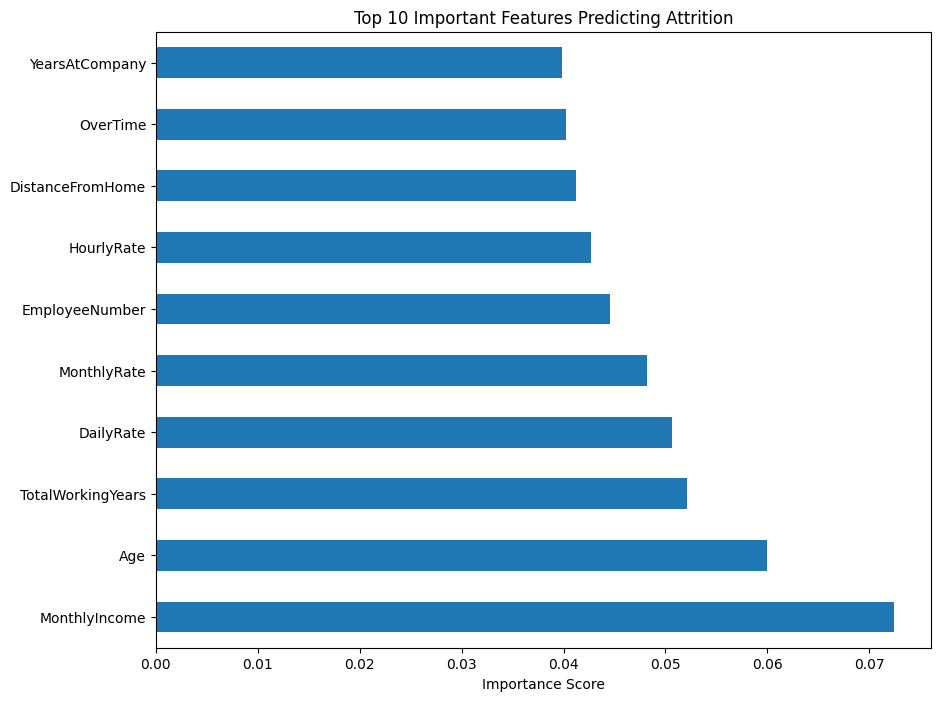

In [44]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features Predicting Attrition")
plt.xlabel("Importance Score")
plt.show()

#Showing future predictions with changes to the model. Running a "What -if" analysis

In [47]:
# Logistic Regression for Scenario Simulation
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [48]:
# Create a sample input from test data
sample = X_test.iloc[0].copy()
original_prediction = model_lr.predict([sample])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
# Simulate improvements in key variables
sample_modified = sample.copy()
sample_modified['MonthlyIncome'] += 2000  # raise income
sample_modified['OverTime'] = 0           # remove overtime
sample_modified['YearsWithCurrManager'] += 2  # more stability

In [50]:
new_prediction = model_lr.predict([sample_modified])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
print(f"Original Prediction (Attrition=1): {original_prediction}")
print(f"Modified Scenario Prediction (Attrition=1): {new_prediction}")

Original Prediction (Attrition=1): 0
Modified Scenario Prediction (Attrition=1): 0


In [52]:
# Find a high-risk employee
high_risk_index = list(model_lr.predict(X_test)).index(1)
sample = X_test.iloc[high_risk_index].copy()
original_prediction = model_lr.predict([sample])[0]

# Modify key features
sample_modified = sample.copy()
sample_modified['MonthlyIncome'] += 2000
sample_modified['OverTime'] = 0
sample_modified['YearsWithCurrManager'] += 2

new_prediction = model_lr.predict([sample_modified])[0]

print(f"Original Prediction (Attrition=1): {original_prediction}")
print(f"Modified Scenario Prediction (Attrition=1): {new_prediction}")


Original Prediction (Attrition=1): 1
Modified Scenario Prediction (Attrition=1): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
print("Original Attrition Probability:", model_lr.predict_proba(sample.to_frame().T)[0][1])
print("Modified Attrition Probability:", model_lr.predict_proba(sample.to_frame().T)[0][1])


Original Attrition Probability: 0.5464040091583103
Modified Attrition Probability: 0.5464040091583103
